# Pretest

Marc Pérez  
May 22, 2025

## Context

To explore, whether the proposed mechanisms and experiments to assess their dynamique, in a first step the Treatment levels $0P$ and $166P$ for all sites were analysed. The experiments were conducted as displayed in the original paper of Flossmann & Richter with adjustments according to developments in technique and available equipment of the soil laboratory. Instead of the CAL-method, the Olsen-method was used to measure and estimate the quantity of P.

## Model of P-release after Flossman & Richter

$\frac{dP}{dt}=k\times(P^S-P)$ The constant $P^S$ denotes the amount of semi-labile P and was originally estimated as $P_\text{Olsen}-P_{H_2O}$. Subsequently the DE is solved exactly, since the soil is as $t=0$ mixed with deionized water, it was assummed that $P(0)=0$

## Exact Solution

$P(t)=P^{\text{S}}-C\times e^{-kt}$ for $P(0)=P_0$ we receive: $P(t)=P^S-(P^S-P_0)\times e^{-kt}$ If we set $P(0)=0$ we receive: $P(t)=P^S\times(1-e^{-kt})$

## Linearisierung

Now we linearize the DE, so that a linear model can be employed to test the relation and estimate the parameters of interest: $P(t)=P^S-(P^S-P_0)\times e^{-kt}$ $P(t)-P^S=-(P^S-P_0)\times e^{-kt}$ $P^S-P(t)=(P^S-P_0)\times e^{-kt}$ $1-\frac{P(t)}{P^S}=(1-\frac{P_0}{P^S})\times e^{-kt}$ Given $P_0=0$, $log(1-\frac{P(t)}{P^S})=-kt$

## Setup and preparation of dataset

In [ ]:
library(tidyr)
library(lme4)


Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList

Now we can see, whether our linearized model displays a linear relation.

Call:
  Model: Y1 ~ t.min. | uid 
   Data: d 

Coefficients:
   (Intercept) 
                       Estimate Std. Error     t value     Pr(>|t|)
Cadenazzo_0P_1      -0.12891945 0.03511973  -3.6708551 4.469113e-04
Cadenazzo_0P_2      -0.12037045 0.03511973  -3.4274305 9.866107e-04
Cadenazzo_166P_1    -0.26932199 0.03511973  -7.6686797 4.731057e-11
Cadenazzo_166P_2    -0.19243796 0.03511973  -5.4794822 5.325856e-07
Ellinghausen_0P_1   -0.10464296 0.03511973  -2.9796059 3.873686e-03
Ellinghausen_0P_2   -0.11438112 0.03511973  -3.2568902 1.684445e-03
Ellinghausen_166P_1 -0.70012081 0.03511973 -19.9352540 6.438545e-32
Ellinghausen_166P_2 -0.16852646 0.03511973  -4.7986256 7.805298e-06
Oensingen_0P_1      -0.03432646 0.03511973  -0.9774122 3.314662e-01
Oensingen_0P_2      -0.05745952 0.03511973  -1.6361036 1.059529e-01
Oensingen_166P_1    -0.13275856 0.03511973  -3.7801698 3.099301e-04
Oensingen_166P_2    -0.17051390 0.03511973  -4.8552162 6.281383e-06
Reckenholz_0P_1     -0.10545869 0.03511

`geom_smooth()` using formula = 'y ~ x'

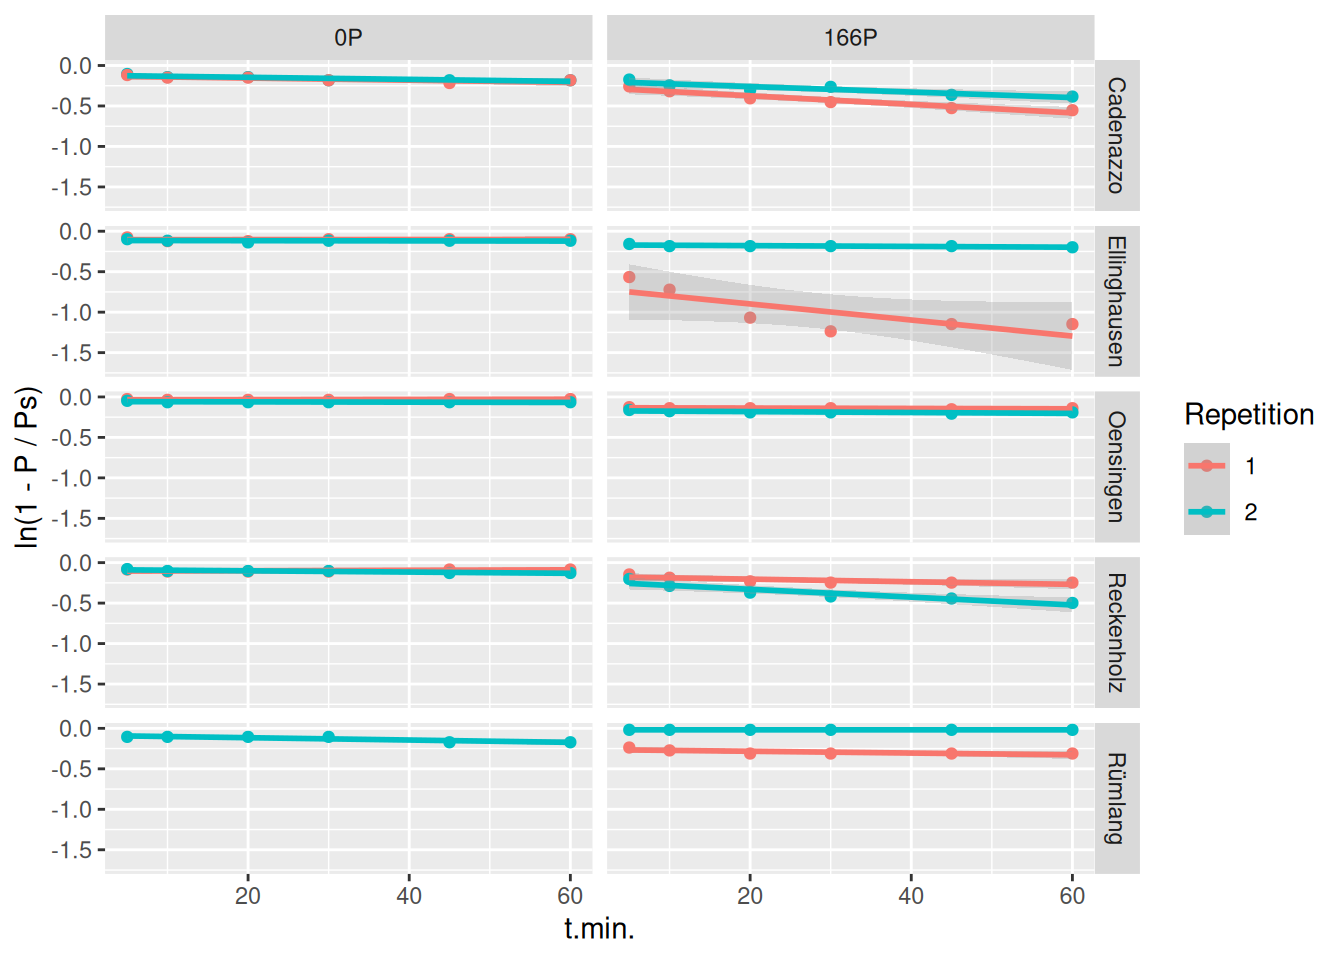

In [ ]:
res <- lmList(Y1 ~ t.min. | uid, d,na.action = na.pass)
summary(res)


If the parameter for the plateau could be estimated directly by using a non-linear non-least-squares model, we could omit the Olsen-measurement in the future.

Call:
  Model: Pv.mg.L. ~ PS * (1 - exp(-k * t.min.)) | uid 
   Data: d[, c("Pv.mg.L.", "uid", "t.min.")] 

Coefficients:
                            PS         k
Cadenazzo_0P_1      0.06070933 0.1860143
Cadenazzo_0P_2      0.04823007 0.1763490
Cadenazzo_166P_1    0.26046234 0.1305482
Cadenazzo_166P_2    0.19714649 0.1444512
Ellinghausen_0P_1   0.05381540 0.3278123
Ellinghausen_0P_2   0.07242959 0.3532154
Ellinghausen_166P_1 0.42710025 0.2454902
Ellinghausen_166P_2 0.17258461 0.4073354
Oensingen_0P_1      0.03588753 0.4093747
Oensingen_0P_2      0.04031233 0.2904299
Oensingen_166P_1    0.13227917 0.4719238
Oensingen_166P_2    0.16110989 0.3861901
Reckenholz_0P_1     0.04591586 0.4471166
Reckenholz_0P_2     0.05514129 0.2479159
Reckenholz_166P_1   0.20764276 0.2019537
Reckenholz_166P_2   0.28976606 0.1539725
Rümlang_0P_1        0.28357079 0.2130559
Rümlang_0P_2        0.02473237 0.2605606
Rümlang_166P_1      0.22830740 0.3379258
Rümlang_166P_2              NA        NA

Degrees of freed

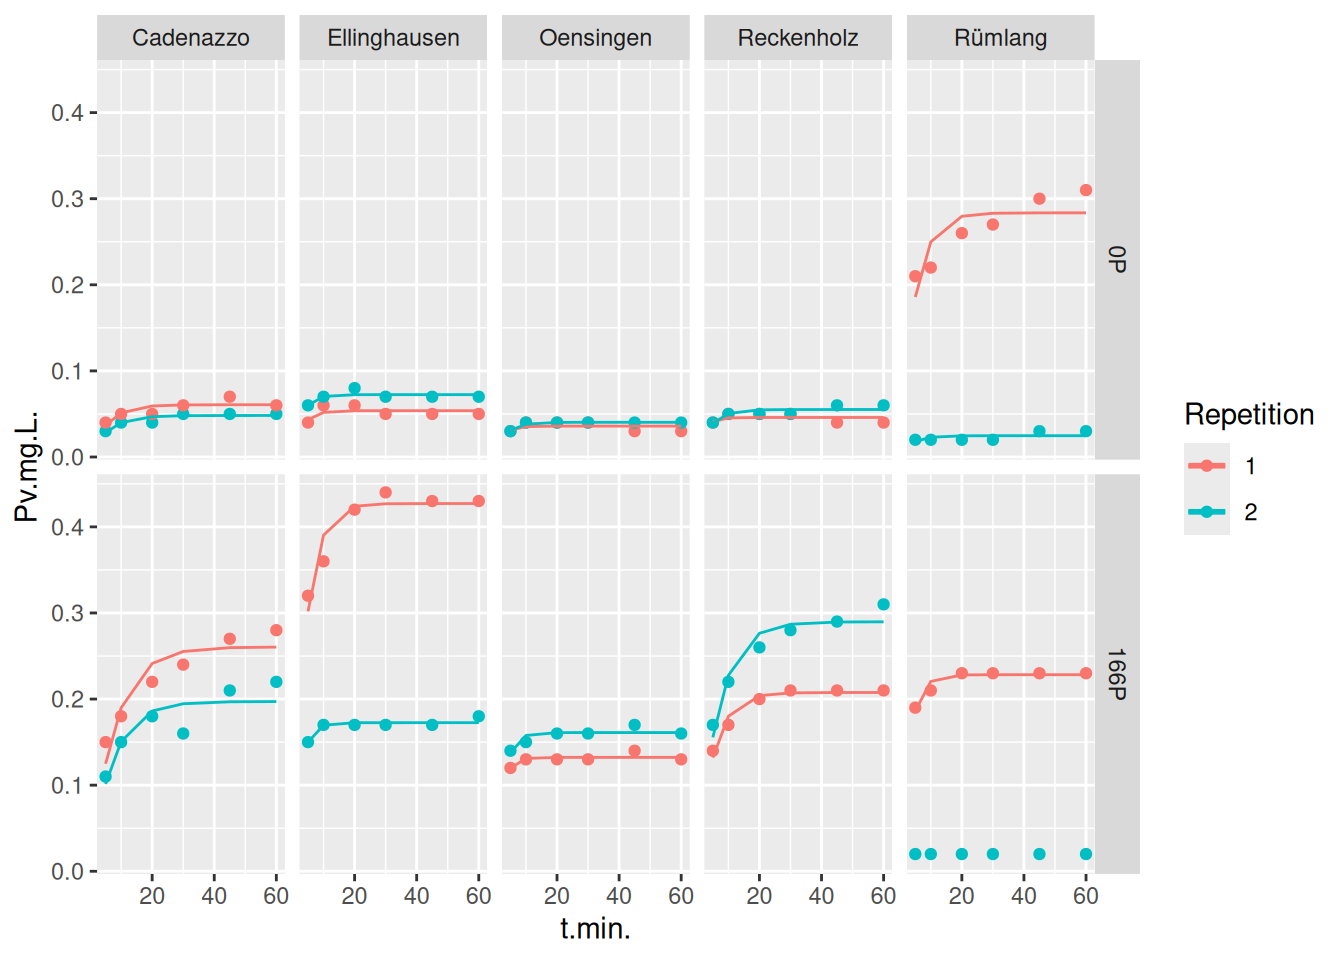

In [ ]:

Res <- nlsList(Pv.mg.L. ~ PS * (1 - exp(-k * t.min.)) | uid, d[, c("Pv.mg.L.", "uid", "t.min.")],  start=list(PS=0.1,k=0.2))
Res
